In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# . Read the dataset to the python environment

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Do necessary pre-processing steps.

In [6]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
df['Classification']=label_en.fit_transform(df['Classification'])

In [8]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [9]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape

(120, 4)

In [12]:
#logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
l_model=LogisticRegression()
l_model.fit(x_train,y_train)
y_pred=l_model.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [15]:
print('accuracy is:',accuracy_score(y_test,y_pred))


accuracy is: 1.0


In [16]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [17]:
#Decision tree classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict=dt_model.predict(x_test)

In [19]:
print('accuracy is:',accuracy_score(y_test,y_predict))

accuracy is: 1.0


In [20]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [21]:
#svm

In [22]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)

In [23]:
print('accuracy is:',accuracy_score(y_test,y_predict))

accuracy is: 1.0


In [24]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [25]:
#KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_predict=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [27]:
acc_values

[1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

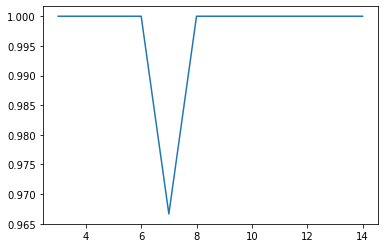

In [28]:
plt.plot(neighbors,acc_values,)

In [29]:
accuracy_score(y_test,y_predict)

1.0

In [30]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
# random forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict=RFC.predict(x_test)

In [33]:
accuracy_score(y_test,y_predict)

1.0

In [34]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [35]:
pd.Series(RFC.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PL    44.763606
PW    43.727874
SL     9.164844
SW     2.343676
dtype: float64

from these, all models are best to predict iris dataset